In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
from sklearn.preprocessing import StandardScaler

In [2]:
audi_cars = pd.read_csv("data/audi_cars_data.csv")
list(audi_cars.columns)
audi_cars.head()

,Price,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type
0,5900.0,Used,Audi,100,2.0 E,C4 (1991-1994),1992,262000.0,101.0,1984.0,Gasoline
1,6900.0,Used,Audi,100,Avant 2.8 E,C4 (1991-1994),1991,332000.0,174.0,2771.0,Gasoline + LPG
2,5000.0,Used,Audi,100,Avant 2.6 E,C4 (1991-1994),1993,500000.0,150.0,2598.0,Gasoline
3,19900.0,Used,Audi,100,NaN,C1 (1968-1976),1974,99000.0,115.0,1900.0,Gasoline
4,14999.0,Used,Audi,100,Avant 2.2,C3 (1982-1991),1987,108729.0,137.0,2226.0,Gasoline


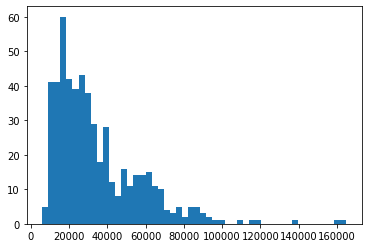

In [3]:
audi_a3_cars = audi_cars[audi_cars["Vehicle_model"] == 'A3']
audi_a3_2010 = audi_a3_cars[audi_a3_cars["Production_year"] == 2010]
audi_a3_2000ccm = audi_a3_cars[audi_a3_cars["Displacement_cm3"] >= 1950]
audi_a3_2000ccm = audi_a3_2000ccm[audi_a3_2000ccm["Displacement_cm3"] <= 2050]
audi_a3_2000ccm = audi_a3_2000ccm.dropna()
np.std(audi_a3_2000ccm["Price"])
plt.figure()
plt.hist(audi_a3_2000ccm["Price"], bins = 50)
plt.show()

In [4]:
import pandas as pd
import cmdstanpy


model = cmdstanpy.CmdStanModel(stan_file='car_price_1_ppc.stan')

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:cmdstanpy:found newer exe file, not recompiling


In [5]:

N = 532
data = {'N': N,
        'x1_new': np.array([np.random.normal(200000, 70000) for _ in range(N)]),
        'x2_new': np.array([np.random.normal(2009, 4) for _ in range(N)])
        }
sim=model.sample(data=data)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status





chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [6]:
sim_pd = sim.draws_pd()
prices_sim_pd = sim_pd.loc[:, 'y_generated[1]':'y_generated[523]'].values
sim_pd.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,y_generated[523],y_generated[524],y_generated[525],y_generated[526],y_generated[527],y_generated[528],y_generated[529],y_generated[530],y_generated[531],y_generated[532]
0,12.7423,0.792465,0.482799,3.0,7.0,0.0,-11.6512,33164.4,-0.187792,19.3665,...,36867.2,37603.0,44966.3,46235.1,31459.8,53372.3,26538.6,23468.1,21877.9,35037.9
1,11.9034,0.587717,0.482799,2.0,7.0,0.0,-10.0106,34344.1,-0.171034,24.8318,...,52194.7,52814.3,59557.2,60664.3,47241.5,67211.3,42770.4,39971.5,38493.5,50469.2
2,14.7254,0.823375,0.482799,3.0,7.0,0.0,-10.3989,35848.3,-0.164445,19.4667,...,44137.8,44765.1,51226.2,52320.1,39394.4,58588.7,35087.2,32397.3,30996.3,42517.0
3,13.5477,0.876209,0.482799,2.0,7.0,0.0,-10.8398,36611.7,-0.159911,22.8021,...,52463.9,53049.0,59352.5,60390.3,47838.2,66506.0,43656.3,41041.4,39660.1,50855.6
4,12.3883,0.936471,0.482799,3.0,7.0,0.0,-10.3815,32796.1,-0.175532,18.0364,...,36124.8,36812.4,43696.4,44881.8,31068.4,51552.7,26472.1,23601.2,22115.4,34413.7


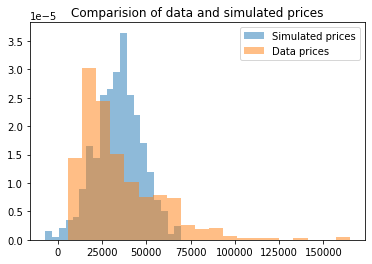

In [7]:
plt.figure()

plt.hist(prices_sim_pd[0], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()

In [8]:
data = {
    'N': len(audi_a3_2000ccm),
    'x1': audi_a3_2000ccm['Mileage_km'].values,
    'x2': audi_a3_2000ccm['Production_year'].values,
    'y': audi_a3_2000ccm['Price'].values
}

model_fit = cmdstanpy.CmdStanModel(stan_file='car_price_1_fit.stan')
fit_1 = model_fit.sample(data=data, seed = 20052020)


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status




chain 1 |█▊        | 00:04 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:05 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:07 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:12 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:17 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:22 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |████▌     | 00:27 Iteration:  800 / 2000 [ 40%]  (Warmup)






chain 1 |█████     | 00:30 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:31 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▎   | 00:31 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████▊   | 00:32 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |███████▎  | 00:32 Iteration: 1300 / 2000 [ 65%]  (Sampli


INFO:cmdstanpy:CmdStan done processing.


In [9]:
fit_pd = fit_1.draws_pd()
fit_pd

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,log_lik[523],log_lik[524],log_lik[525],log_lik[526],log_lik[527],log_lik[528],log_lik[529],log_lik[530],log_lik[531],log_lik[532]
0,-41414.7,0.979388,0.051812,5.0,31.0,0.0,41415.9,31619.0,-0.218410,23.2582,...,-19.8050,-33.3460,-32.7116,-27.4459,-28.4724,-20.3128,-11.6237,-215.997,-57.5919,-12.9312
1,-41414.6,0.998133,0.051812,5.0,55.0,0.0,41415.1,32614.5,-0.220080,22.8727,...,-19.5582,-33.3257,-32.8356,-27.2130,-28.4012,-19.8874,-11.5816,-217.919,-58.1020,-12.8926
2,-41415.4,0.889772,0.051812,4.0,31.0,0.0,41416.4,32995.6,-0.219665,22.7303,...,-19.9736,-32.7530,-33.3110,-27.7225,-28.8816,-20.3529,-11.7847,-218.692,-57.1371,-13.1296
3,-41415.7,0.978223,0.051812,2.0,3.0,0.0,41415.9,32883.9,-0.219993,22.6957,...,-19.3667,-33.5505,-32.5053,-26.9489,-28.1175,-19.7021,-11.4822,-216.551,-58.3599,-12.7713
4,-41416.4,0.834698,0.051812,3.0,11.0,0.0,41419.1,33159.1,-0.220558,22.7483,...,-20.0569,-32.4757,-33.7126,-27.8843,-29.1421,-20.3429,-11.8749,-220.898,-57.0478,-13.2445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-41415.3,0.975649,0.067528,4.0,15.0,0.0,41417.0,31465.6,-0.220234,23.4382,...,-19.4128,-33.3384,-32.6413,-27.0163,-28.2152,-19.7220,-11.5261,-216.988,-58.1090,-12.8252
3996,-41416.3,0.897652,0.067528,4.0,27.0,0.0,41418.0,31205.0,-0.219754,23.4933,...,-19.3364,-33.8127,-32.4368,-26.9188,-28.0699,-19.6948,-11.4430,-216.776,-58.7121,-12.7273
3997,-41414.3,0.847562,0.067528,2.0,7.0,0.0,41417.6,31308.7,-0.219639,23.5168,...,-19.7477,-33.1759,-33.0028,-27.4424,-28.5972,-20.1246,-11.6569,-218.175,-57.7601,-12.9810
3998,-41415.7,0.954094,0.067528,4.0,31.0,0.0,41416.3,31338.4,-0.220239,23.5443,...,-19.5676,-32.9105,-32.8348,-27.1968,-28.3996,-19.8774,-11.6230,-216.899,-57.4342,-12.9371


In [10]:
prices = fit_pd.loc[:, 'y_generated[1]':'y_generated[532]'].values

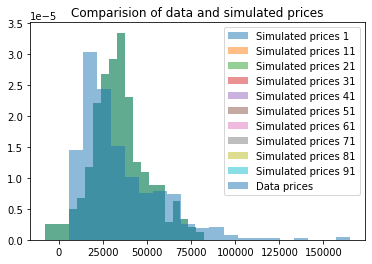

In [11]:
plt.figure()
for i in range(1, 100, 10):
    plt.hist(prices[1], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices {i}')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()

In [12]:
scaler = StandardScaler()
data_standarzed = audi_a3_2000ccm
data_standarzed[['Mileage_km', 'Production_year']] = scaler.fit_transform(data_standarzed[['Mileage_km', 'Production_year']])

print(data_standarzed)

        Price Condition Vehicle_brand Vehicle_model  \
379   49900.0      Used          Audi            A3   
382   13900.0      Used          Audi            A3   
384   19900.0      Used          Audi            A3   
391   13500.0      Used          Audi            A3   
393   66900.0      Used          Audi            A3   
...       ...       ...           ...           ...   
2732  16500.0      Used          Audi            A3   
2734  39900.0      Used          Audi            A3   
2736  29440.0      Used          Audi            A3   
2737  58500.0      Used          Audi            A3   
2749  39900.0      Used          Audi            A3   

                      Vehicle_version Vehicle_generation  Production_year  \
379                2.0 TDI Attraction         8V (2012-)         1.295706   
382             2.0 TDI Sportback DPF     8P (2003-2012)        -0.389074   
384            2.0 TDI DPF Attraction     8P (2003-2012)        -0.629757   
391              2.0 TDI Ambien

In [13]:
model_2 = cmdstanpy.CmdStanModel(stan_file='car_price_2_ppc.stan')

INFO:cmdstanpy:compiling stan file /home/DA/project/car_price_2_ppc.stan to exe file /home/DA/project/car_price_2_ppc


ValueError: Unable to compile Stan model file: /home/DA/project/car_price_2_ppc.stan.

In [ ]:
N = 532
data = {'N': N,
        'x1_new': np.linspace(data_standarzed['Mileage_km'].min, data_standarzed['Mileage_km'].max, len(data_standarzed)),
        'x2_new': np.linspace(data_standarzed['Production_year'].min, data_standarzed['Production_year'].max, len(data_standarzed)),
        }
sim_2=model_2.sample(data=data)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [ ]:
sim_pd_2 = sim_2.draws_pd()
prices_sim_pd_2 = sim_pd_2.loc[:, 'y_generated[1]':'y_generated[523]'].values
sim_pd_2.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,y_generated[524],y_generated[525],y_generated[526],y_generated[527],y_generated[528],y_generated[529],y_generated[530],y_generated[531],y_generated[532],lambda
0,10.8889,0.999922,0.095392,5.0,31.0,0.0,-5.99894,23334.8,-0.173471,18.9355,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.4307,0.978131,0.095392,3.0,15.0,0.0,-7.16292,23535.5,-0.175273,19.1018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.2402,0.949999,0.095392,4.0,20.0,1.0,-11.14430,24061.3,-0.172164,19.4241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.3430,0.922538,0.095392,3.0,13.0,1.0,-12.00610,23865.2,-0.170368,20.1332,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.8441,0.888191,0.095392,3.0,9.0,1.0,-10.44980,24113.8,-0.172196,20.4982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


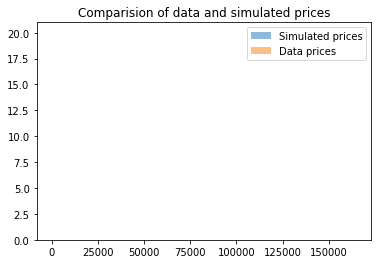

In [ ]:
plt.figure()
plt.hist(prices_sim_pd_2[1], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()

In [ ]:
data = {
    'N': len(audi_a3_2000ccm),
    'x1': audi_a3_2000ccm['Mileage_km'].values,
    'x2': audi_a3_2000ccm['Production_year'].values,
    'y': audi_a3_2000ccm['Price'].values
}

model_fit_2 = cmdstanpy.CmdStanModel(stan_file='car_price_2_fit.stan')
fit_2 = model_fit_2.sample(data=data, seed = 20052020, log_likelihood = True)

INFO:cmdstanpy:compiling stan file /home/DA/project/car_price_2_fit.stan to exe file /home/DA/project/car_price_2_fit
ERROR:cmdstanpy:Stan program failed to compile:
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/DA/project/car_price_2_fit.hpp /home/DA/project/car_price_2_fit.stan
Semantic error in '/home/DA/project/car_price_2_fit.stan', line 27, column 4 to column 36:
   -------------------------------------------------
    25:    for (i in 1:N) {
    26:      lambda[i] ~ normal(alpha + beta1 * x1[i] + beta2 * x2[i], sigma);
    27:      y[i] ~ poisson(fabs(lambda[i]));
             ^
    28:    }
    29:  }
   -------------------------------------------------

Ill-typed arguments to '~' statement. No distribution 'poisson' was found with the correct signature.
make: *** [make/program:50: /home/DA/project/car_price_2_fit.hpp] Error 1

Command ['make', '/home/DA/project/car_price_2_fit']
	error during processing No such file or directory



ValueError: Unable to compile Stan model file: /home/DA/project/car_price_2_fit.stan.

In [ ]:
fit_pd_2 = fit_2.draws_pd()
fit_pd_2

: 

In [ ]:
prices = fit_pd.loc[:, 'y_generated[1]':'y_generated[532]'].values

: 

In [ ]:
plt.figure()
plt.hist(prices[1], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()

: 

In [ ]:
compare_model_loo = az.compare(
 {
 "fit_1": az.from_cmdstanpy(fit_1),
 "fit_2": az.from_cmdstanpy(fit_2)
 },
 ic="waic",
 scale="deviance"
)


: 